<a href="https://colab.research.google.com/github/jben-hun/colab_notebooks/blob/master/gravitySort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gravity Sort**

Gravity sort, a.k.a. bead sort is a fun sorting method for positive integers. The area of interest of this algorithm is hardware supported "bead dropping" to fill the role of gravity, which makes it work fast in theory. Extending to negative integers is straightforward by shifting the values to $\mathbb{N}_0$ before sorting.

Complexity:
*   Time: $\mathcal{O}(n*m)$
*   Space: $\mathcal{O}(n*m)$, or $\mathcal{O}(n+m)$ in memory conservative mode

Where $n$ is the number of values and $m$ is the maximal value of the array.

**Definition**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

unsorted = np.random.randint(0, 10, 10)

def is_monotone(x, *, decreasing=False, strict=False):
    a = x[1:]
    b = x[:-1]

    if decreasing:
        if strict:
            return np.all(a<b)
        else:
            return np.all(a<=b)
    else:
        if strict:
            return np.all(a>b)
        else:
            return np.all(a>=b)

def gravity_sort(x, *, reverse=False, memory_conservative=False):
    length = len(x)
    maximum = x.max()

    if memory_conservative:
        sums = np.zeros(maximum, int)
        for i in range(length):
            sums[:x[i]] += 1

        sums_old = sums.copy()
        sums = np.zeros(length, int)
        for i in range(maximum):
            sums[:sums_old[i]] += 1

    else:
        a = np.arange(maximum)[np.newaxis, :] < x[:, np.newaxis]
        sums = a.sum(axis=0, dtype=int)

        a = np.arange(length)[:, np.newaxis] < sums[np.newaxis, :]
        sums = a.sum(axis=1, dtype=int)

    if not reverse:
        sums = sums[::-1]

    return sums

**Demonstration**

Comparing with NumPy's built-in sorter

In [ ]:
%timeit np.sort(unsorted)
%timeit gravity_sort(unsorted)
%timeit gravity_sort(unsorted, memory_conservative=True)

sorted = np.sort(unsorted)
gravity_sorted = gravity_sort(unsorted)
gravity_sorted_conservative = gravity_sort(unsorted, memory_conservative=True)

print(unsorted)
print(sorted)
print(gravity_sorted)
print(gravity_sorted_conservative)
print(is_monotone(unsorted))
print(is_monotone(sorted))
print(is_monotone(gravity_sorted))
print(is_monotone(gravity_sorted_conservative))

The slowest run took 22.84 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.25 µs per loop
The slowest run took 12.49 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 19.2 µs per loop
10000 loops, best of 3: 44.9 µs per loop
[4 0 9 6 0 1 4 9 1 0]
[0 0 0 1 1 4 4 6 9 9]
[0 0 0 1 1 4 4 6 9 9]
[0 0 0 1 1 4 4 6 9 9]
False
True
True
True


**Visualization**

Plotting the "gravity-shifted" values with Matplotlib

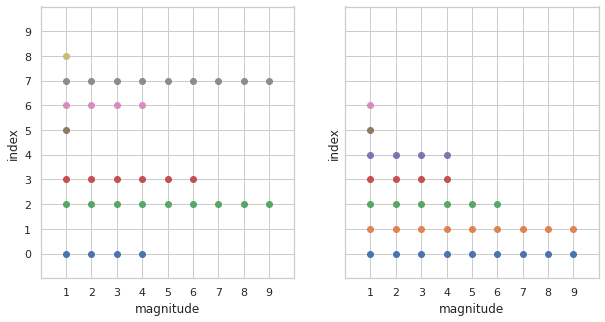

In [ ]:
# copy of input
x = unsorted.copy()

# the sort
length = len(x)
maximum = x.max()

a = np.arange(maximum)[np.newaxis, :] < x[:, np.newaxis]
sums = a.sum(axis=0, dtype=int)

a = np.arange(length)[:, np.newaxis] < sums[np.newaxis, :]
sums = a.sum(axis=1, dtype=int)

# plot
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
plt.xticks(range(maximum), labels=range(1, maximum + 1))
plt.yticks(range(length))
plt.xlim(-1, maximum)
plt.ylim(-1, length)
for ax in axs:
    ax.set_xlabel('magnitude')
    ax.set_ylabel('index')
for i in range(length):
    axs[0].scatter(np.arange(x[i]), np.full(x[i], i))
for i in range(length):
    axs[1].scatter(np.arange(sums[i]), np.full(sums[i], i))

plt.show()

**References**
*   https://en.wikipedia.org/wiki/Bead_sort